In [290]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("House Price Prediction Dataset.csv")

In [3]:
df.shape

(2000, 10)

In [4]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


# Data Cleaning & Transformation

In [21]:
df.drop(columns='Id', inplace=True)

In [6]:
df['YearBuilt'].max()

2023

In [7]:
df["YearBuilt"].min()

1900

In [16]:
df['Age'] = dt.datetime.now().year - df['YearBuilt']

In [22]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Age
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,55
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,67
2,3592,2,2,3,1938,Downtown,Good,No,266746,87
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,123
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,50


In [25]:
df.duplicated().sum()

0

🔢 Scaling Numeric Features

In [196]:
numeric_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Age']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df[numeric_features]

,Area,Bedrooms,Bathrooms,Floors,Age
0,-1.101471,1.401791,1.305568,1.244151,-0.238155
1,1.147485,1.401791,1.305568,1.244151,0.095942
2,0.622317,-0.704581,-0.498326,1.244151,0.652770
3,-1.405759,0.699667,-0.498326,0.008035,1.655061
4,1.652574,-1.406705,1.305568,0.008035,-0.377363
...,...,...,...,...,...
1995,1.705091,1.401791,1.305568,1.244151,1.070391
1996,0.200638,1.401791,-0.498326,-1.228081,-1.602385
1997,-1.331618,1.401791,-1.400273,0.008035,1.627219
1998,0.985301,-0.002457,-1.400273,0.008035,0.708453


🔢 Encoding Categorical Features

In [203]:
categorical_features = ['Location','Condition', 'Garage']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
df_encoded

,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,True,False,True,False,False,True
4,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...
1995,False,True,False,False,False,True,False
1996,False,True,False,False,False,True,True
1997,True,False,False,False,False,True,False
1998,False,False,True,False,False,False,True


In [211]:
df = df.drop(columns=categorical_features)

In [212]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Age,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,-1.101471,1.401791,1.305568,1.244151,1970,149919,-0.238155,False,False,False,False,False,False,False
1,1.147485,1.401791,1.305568,1.244151,1958,424998,0.095942,False,False,False,False,False,False,False
2,0.622317,-0.704581,-0.498326,1.244151,1938,266746,0.652770,False,False,False,False,True,False,False
3,-1.405759,0.699667,-0.498326,0.008035,1902,244020,1.655061,False,True,False,True,False,False,True
4,1.652574,-1.406705,1.305568,0.008035,1975,636056,-0.377363,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.705091,1.401791,1.305568,1.244151,1923,295620,1.070391,False,True,False,False,False,True,False
1996,0.200638,1.401791,-0.498326,-1.228081,2019,580929,-1.602385,False,True,False,False,False,True,True
1997,-1.331618,1.401791,-1.400273,0.008035,1903,476925,1.627219,True,False,False,False,False,True,False
1998,0.985301,-0.002457,-1.400273,0.008035,1936,161119,0.708453,False,False,True,False,False,False,True


# Exploratory Data Analysis (EDA)

In [192]:
df.describe().round()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Age
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,2786.0,3.0,3.0,2.0,1961.0,537677.0,64.0
std,1295.0,1.0,1.0,1.0,36.0,276429.0,36.0
min,501.0,1.0,1.0,1.0,1900.0,50005.0,2.0
25%,1653.0,2.0,2.0,1.0,1930.0,300098.0,32.0
50%,2833.0,3.0,3.0,2.0,1961.0,539254.0,64.0
75%,3888.0,4.0,4.0,3.0,1993.0,780086.0,95.0
max,4999.0,5.0,4.0,3.0,2023.0,999656.0,125.0


📊 Dataset Summary Insights

- Area ranges from 501 sq.ft to 4999 sq.ft, with an average of around 2786 sq.ft.
- Bedrooms range from 1 to 5, with the median of 3 bedrooms.
- Bathrooms range from 1 to 4, with the median of 3 bathrooms.
- Floors are between 1 and 3, with most houses having 2 floors.
- House age ranges from 2 to 125 years, with the median of 64 years.
- Price spans from $50,000 to $1M, with an average price near $537,677.
- Dataset is balanced in terms of property features.

### Area Distribution

In [26]:
df['Area'].value_counts()

Area
4219    5
1752    4
1516    4
4646    4
1743    4
       ..
3948    1
4312    1
2862    1
2475    1
4062    1
Name: count, Length: 1622, dtype: int64

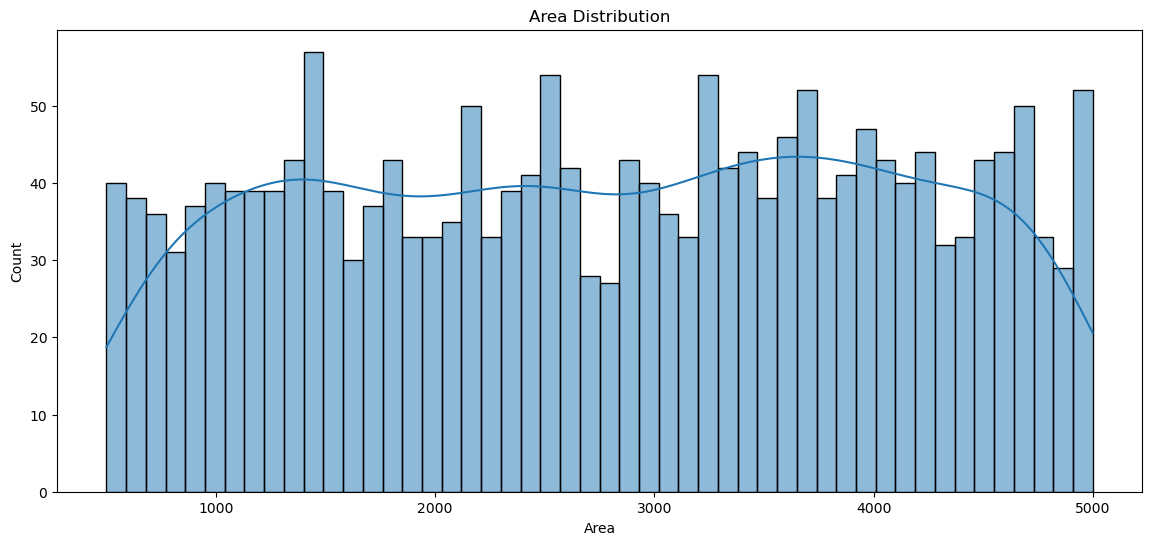

In [37]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Area'], bins=50, kde=True)
plt.title('Area Distribution')

plt.show()

### Number of Bedrooms

In [36]:
df['Bedrooms'].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

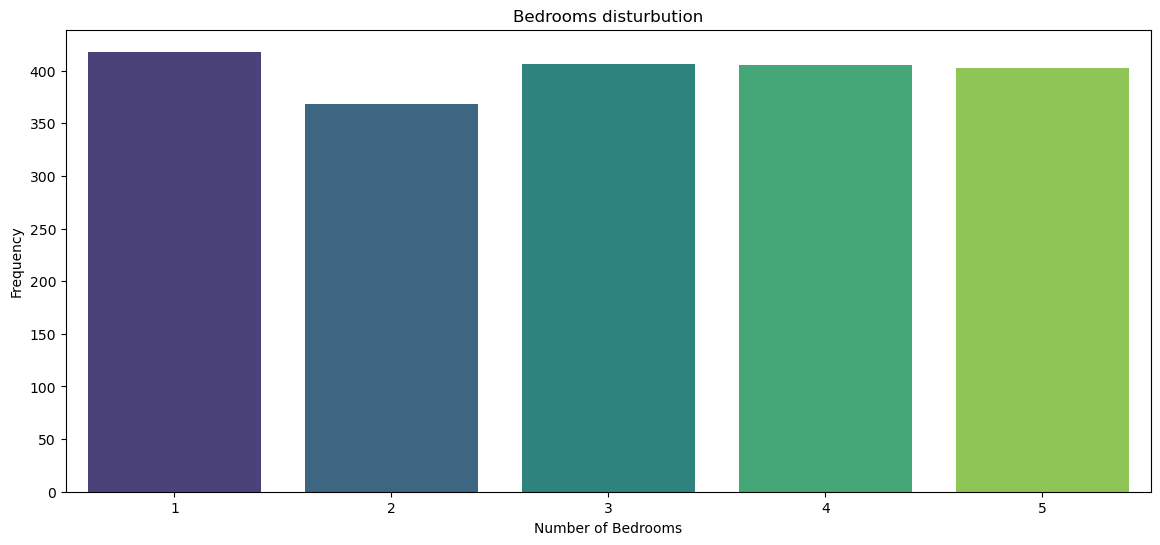

In [60]:
plt.figure(figsize=(14,6))
sns.barplot(

    x=df['Bedrooms'].value_counts().index,
    y=df['Bedrooms'].value_counts().values,
    palette='viridis'
)
plt.title('Bedrooms disturbution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

### Number of Bathrooms

In [57]:
df['Bathrooms'].value_counts()

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64

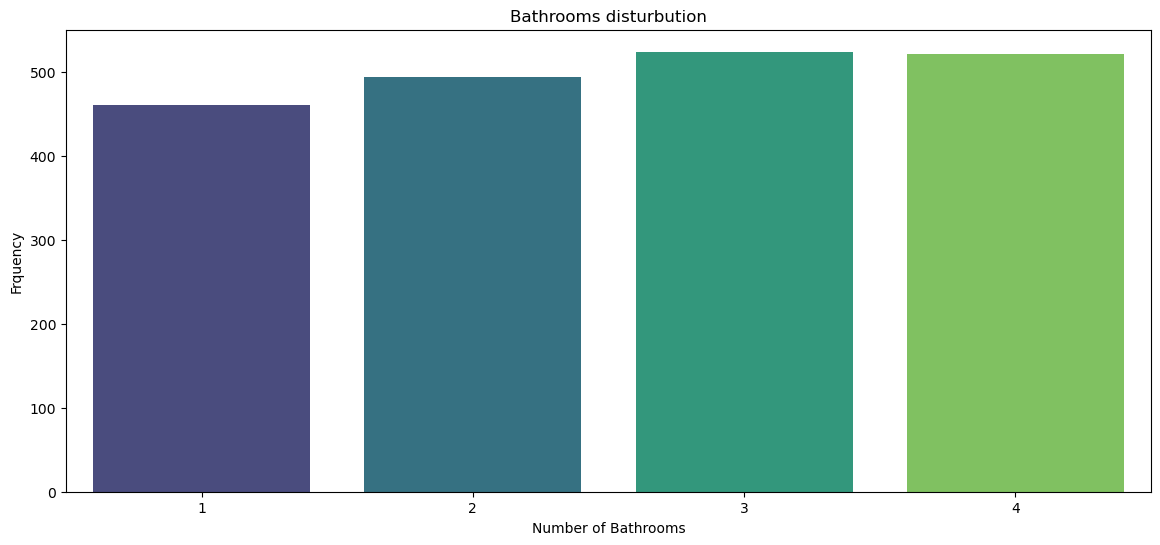

In [59]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x=df['Bathrooms'].value_counts().index,
    y=df['Bathrooms'].value_counts().values,
    palette='viridis'
)
plt.title('Bathrooms disturbution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frquency')
plt.show()

In [153]:
bedrooms_bathrooms = df.groupby('Bedrooms')['Bathrooms'].value_counts().reset_index()
bedrooms_bathrooms

,Bedrooms,Bathrooms,count
0,1,3,125
1,1,4,107
2,1,1,97
3,1,2,89
4,2,2,108
5,2,4,98
6,2,3,87
7,2,1,75
8,3,3,108
9,3,2,100


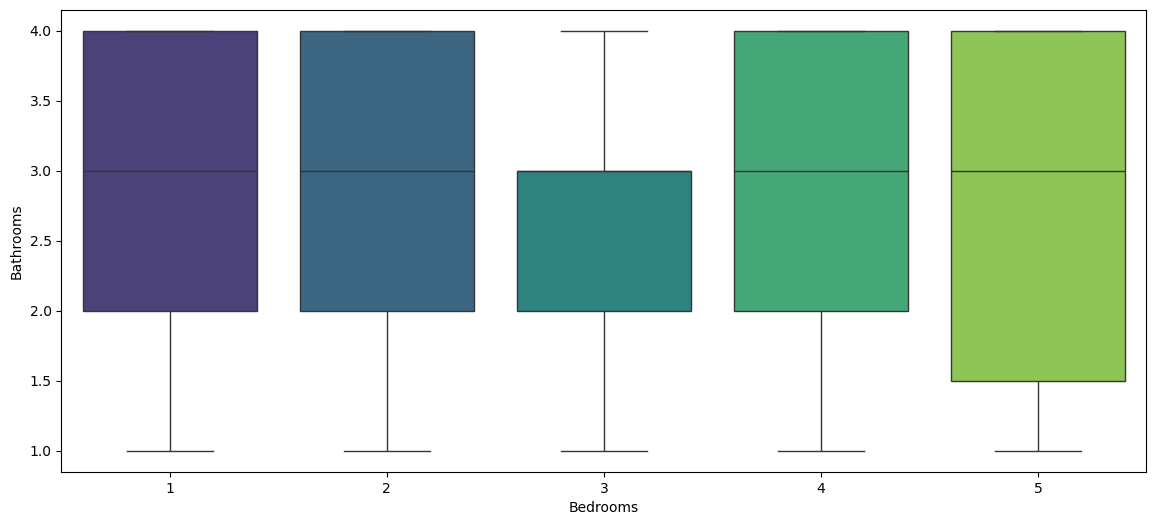

In [163]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df,
    x='Bedrooms',
    y='Bathrooms',
    palette='viridis'
)
plt.show()

### Number of Floors

In [62]:
df['Floors'].value_counts()

Floors
2    691
1    661
3    648
Name: count, dtype: int64

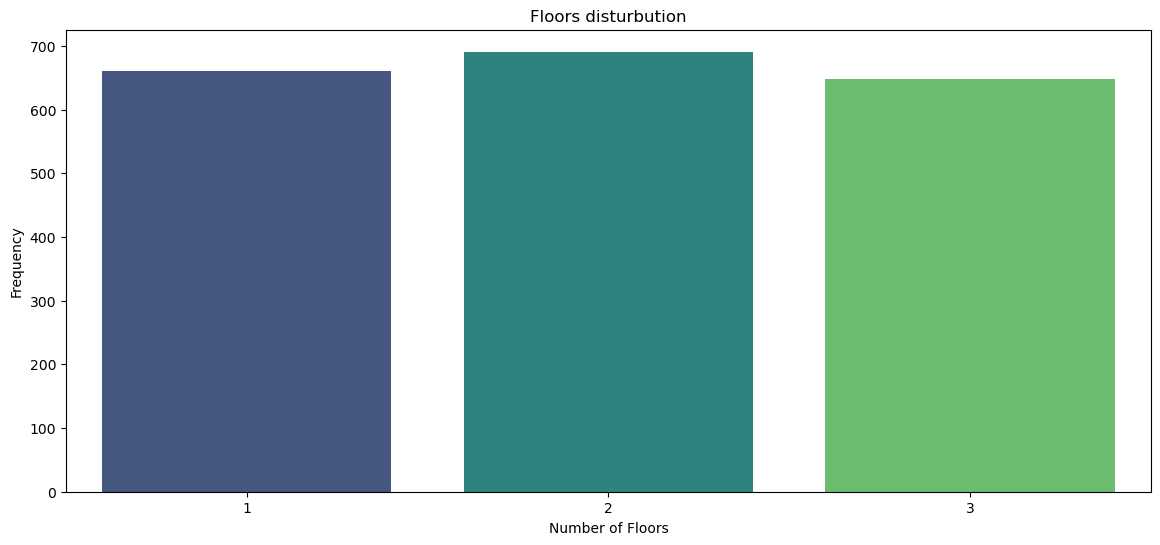

In [63]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x=df['Floors'].value_counts().index,
    y=df['Floors'].value_counts().values,
    palette='viridis'
)
plt.title('Floors disturbution')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.show()

### Age of House

In [75]:
df['Age'].describe()

count    2000.000000
mean       63.554000
std        35.926695
min         2.000000
25%        32.000000
50%        64.000000
75%        95.000000
max       125.000000
Name: Age, dtype: float64

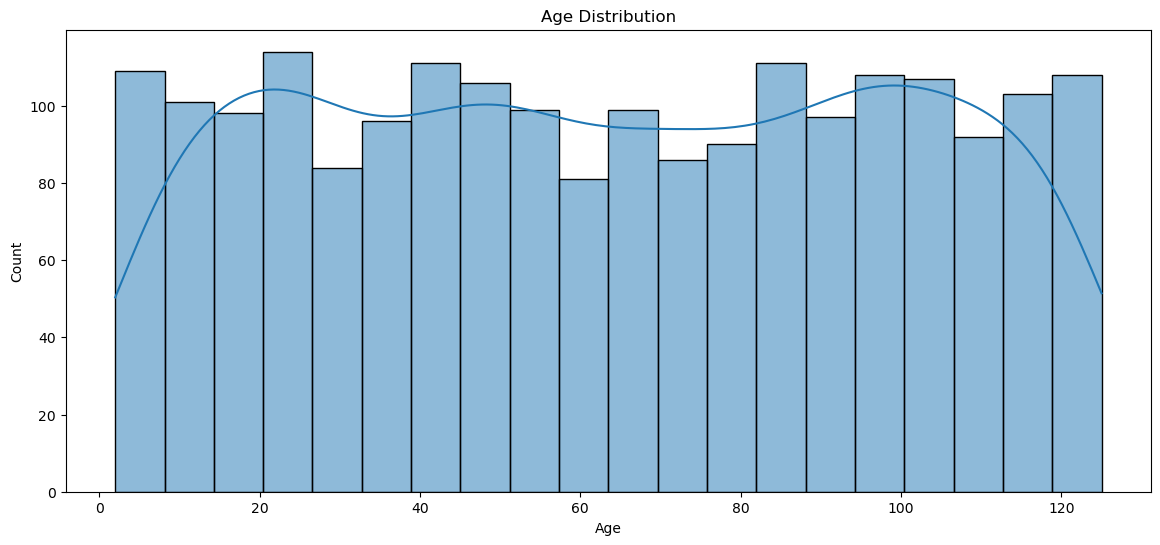

In [82]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

<Axes: ylabel='Age'>

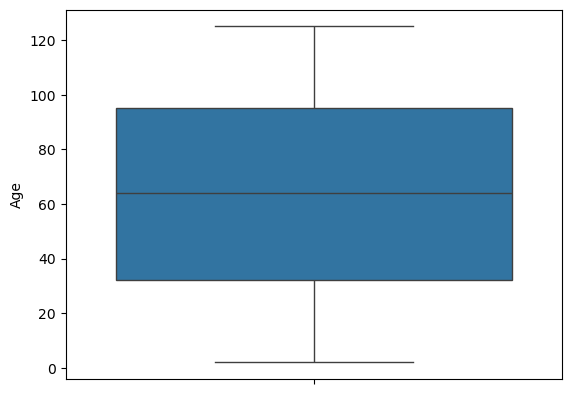

In [77]:
sns.boxplot(df['Age'])

In [122]:
# Houses with age less than 25 years
less25_years = df[df['Age'] < 25]
less25_years

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Age
13,1684,1,1,1,2004,Rural,Good,No,399355,21
18,1582,2,2,2,2013,Suburban,Good,No,989305,12
19,3058,5,2,2,2016,Downtown,Excellent,No,218767,9
28,1767,3,3,3,2011,Downtown,Poor,Yes,948212,14
32,4390,1,1,1,2020,Rural,Poor,No,202185,5
...,...,...,...,...,...,...,...,...,...,...
1976,4426,1,3,3,2017,Rural,Good,No,254739,8
1988,2168,2,4,1,2010,Rural,Fair,No,427972,15
1992,2450,1,3,3,2006,Urban,Good,Yes,225508,19
1993,865,4,4,2,2020,Rural,Poor,No,308446,5


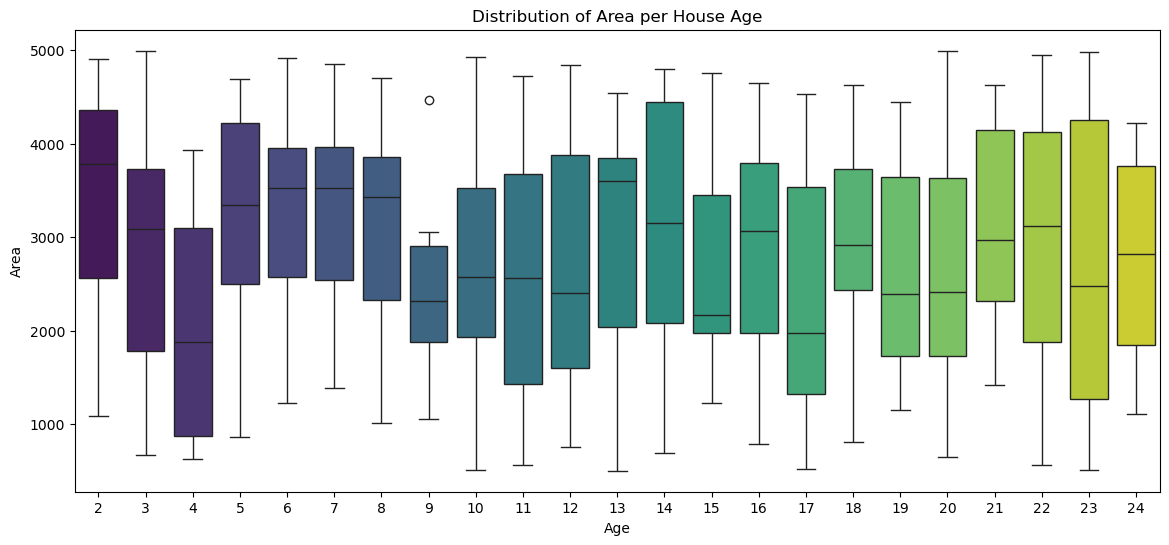

In [130]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x=less25_years['Age'],
    y=less25_years['Area'],
    palette='viridis'
)
plt.title('Distribution of Area per House Age')
plt.show()

### House Condition

In [84]:
df['Condition'].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

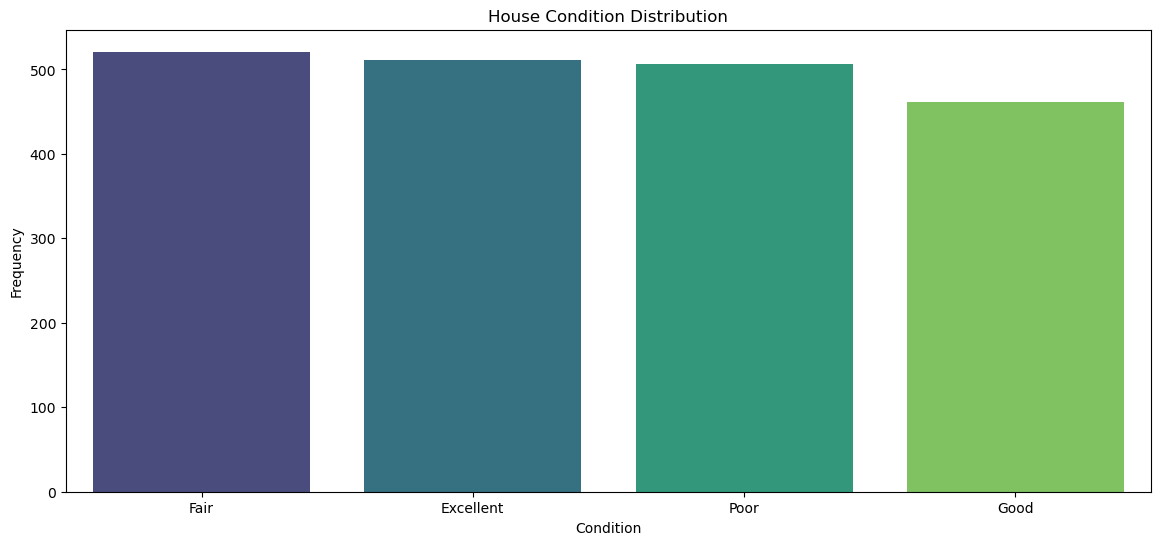

In [86]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x=df['Condition'].value_counts().index,
    y=df['Condition'].value_counts().values,
    palette='viridis'
)
plt.title('House Condition Distribution')
plt.ylabel('Frequency')
plt.show()

### House Price

In [93]:
df['Price'].describe().round()

count      2000.0
mean     537677.0
std      276429.0
min       50005.0
25%      300098.0
50%      539254.0
75%      780086.0
max      999656.0
Name: Price, dtype: float64

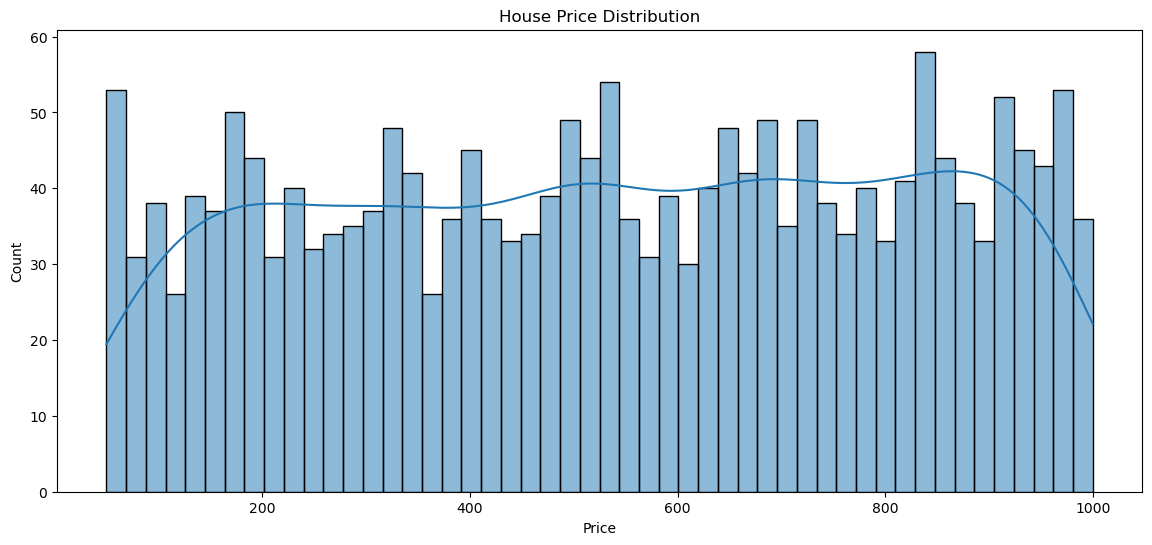

In [97]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Price']/1000, bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

### Price Variation by Number of Bedrooms

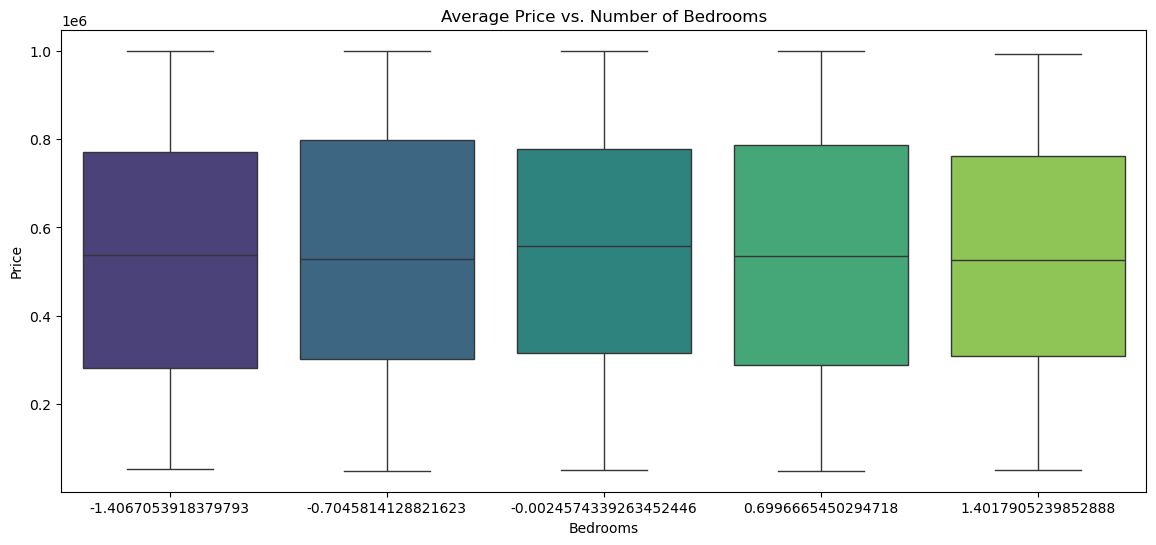

In [235]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x=df['Bedrooms'],
    y=df['Price'],
    palette='viridis'
)
plt.title('Average Price vs. Number of Bedrooms')
plt.ylabel('Price')
plt.show()

### Area vs. Number of Bedrooms

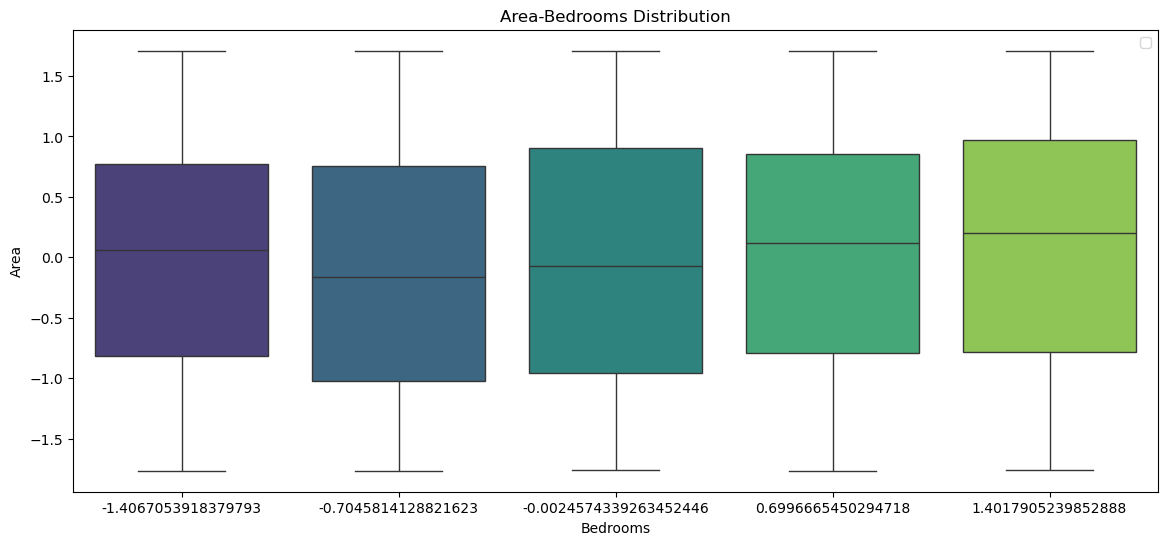

In [236]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['Bedrooms'], y=df['Area'], palette='viridis')
plt.legend(loc='best')
plt.title('Area-Bedrooms Distribution')
plt.show()

### Correlation Matrix

In [237]:
corr = df.corr(numeric_only=True)
corr

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Age,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
Area,1.000000,0.047523,0.021881,0.017749,-0.011609,0.001542,0.011609,-0.017328,0.003404,0.000010,0.012805,0.001289,-0.003387,-0.003441
Bedrooms,0.047523,1.000000,-0.011990,0.010435,-0.014125,-0.003471,0.014125,-0.011276,-0.010409,0.025640,0.002541,-0.008847,0.010673,-0.041713
Bathrooms,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.015737,0.000839,-0.020028,-0.000904,-0.007326,-0.029646,0.021735,0.013355,0.004057
Floors,0.017749,0.010435,0.029089,1.000000,-0.006474,0.055890,0.006474,-0.007149,-0.009907,0.014640,-0.000864,0.001462,0.017469,-0.004635
YearBuilt,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,0.004845,-1.000000,-0.009179,-0.004632,-0.029859,-0.039087,0.022457,0.020892,-0.011703
Price,0.001542,-0.003471,-0.015737,0.055890,0.004845,1.000000,-0.004845,0.001890,0.040303,-0.038312,0.049218,-0.017179,-0.018437,0.002842
Age,0.011609,0.014125,0.000839,0.006474,-1.000000,-0.004845,1.000000,0.009179,0.004632,0.029859,0.039087,-0.022457,-0.020892,0.011703
Location_Rural,-0.017328,-0.011276,-0.020028,-0.007149,-0.009179,0.001890,0.009179,1.000000,-0.314480,-0.315338,0.022832,-0.025844,0.004976,0.028254
Location_Suburban,0.003404,-0.010409,-0.000904,-0.009907,-0.004632,0.040303,0.004632,-0.314480,1.000000,-0.319261,0.003137,-0.000920,0.001503,0.027303
Location_Urban,0.000010,0.025640,-0.007326,0.014640,-0.029859,-0.038312,0.029859,-0.315338,-0.319261,1.000000,-0.003568,0.006115,0.018913,-0.010005


<Axes: >

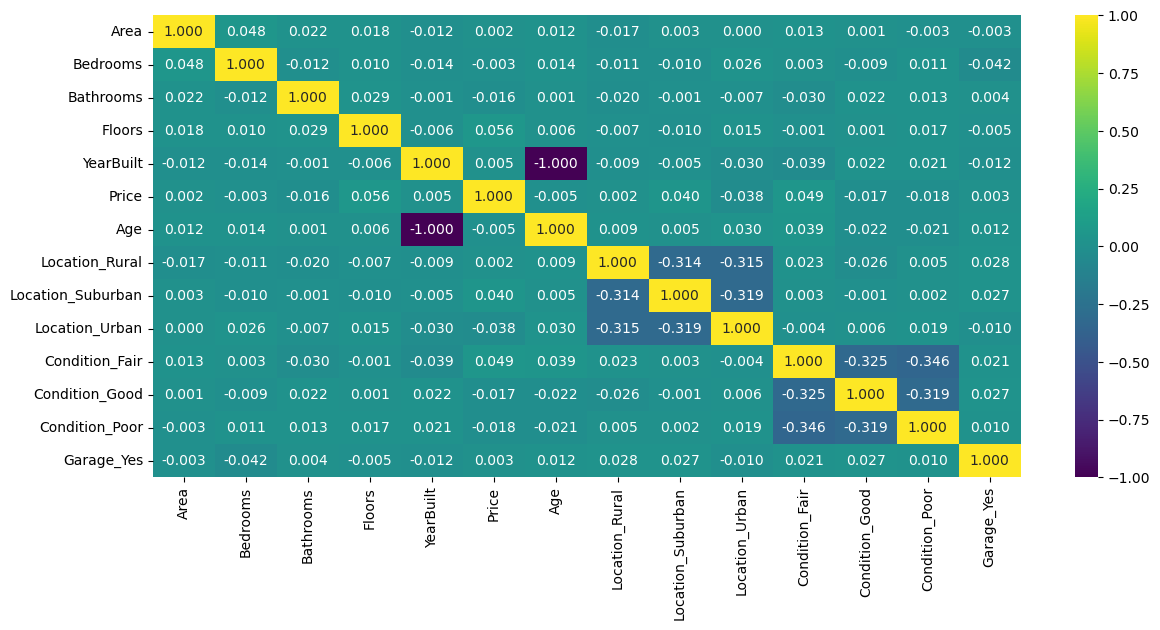

In [241]:
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.3f')

# Linear Regression

In [244]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Age']]
y = df['Price']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [247]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [265]:
y_pred = model.predict(X_test)

### Actual vs. Predicted Price

Text(0, 0.5, 'Predicted House Prices')

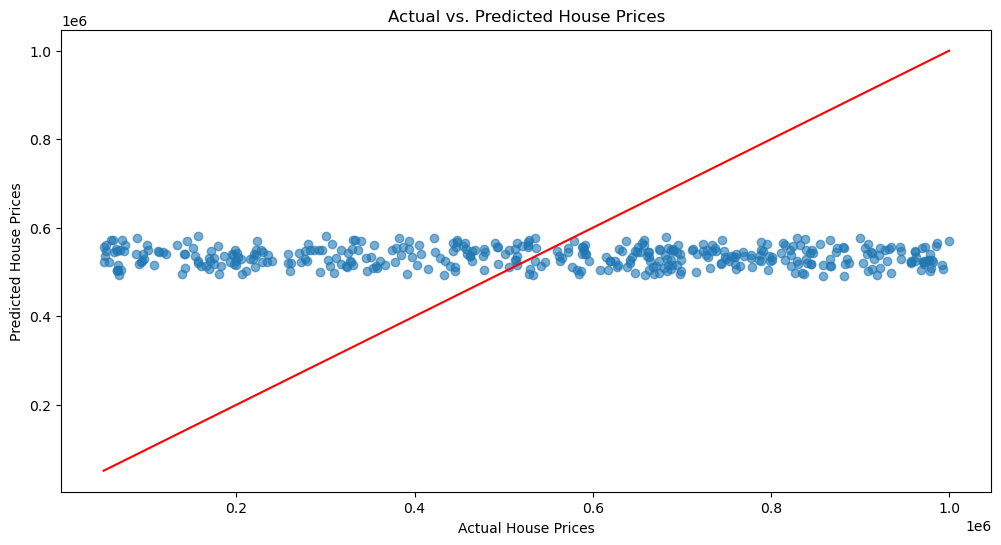

In [264]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='r'
        )
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

### Relation between Area and Price

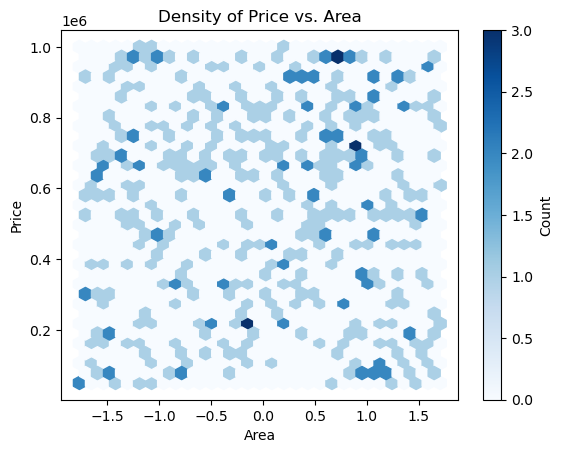

In [275]:
plt.hexbin(X_test['Area'], y_test, gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Density of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

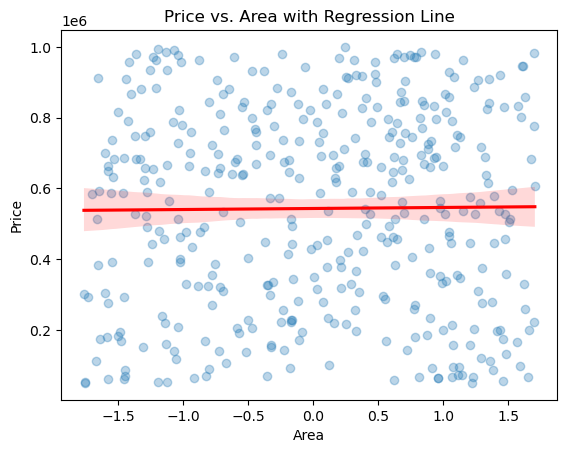

In [280]:
sns.regplot(x=X_test['Area'], y=y_test,
           scatter_kws={'alpha': 0.3},
           line_kws={'color': 'red'})
plt.title("Price vs. Area with Regression Line")
plt.show()

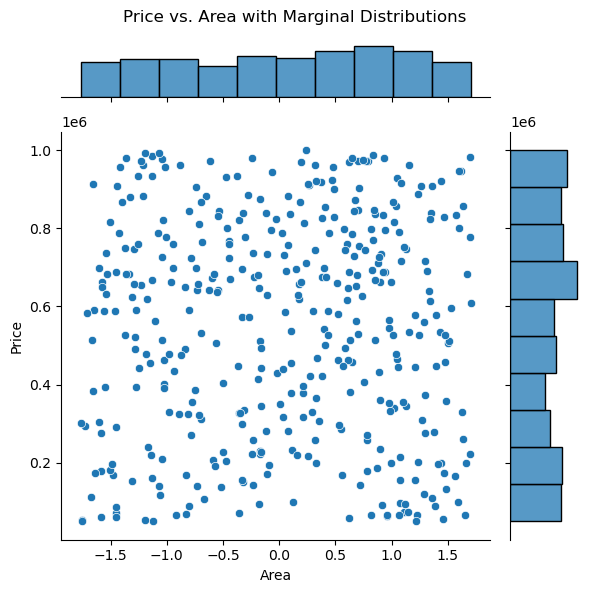

In [286]:
sns.jointplot(x=X_test['Area'], y=y_test,
             kind='scatter')
plt.suptitle("Price vs. Area with Marginal Distributions")
plt.tight_layout()

# Model Evaluation

In [291]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 78789724000.88458
Root Mean Squared Error (RMSE): 280695.0729900412
Mean Absolute Error (MAE): 244587.1999197856
R-squared: -0.01273663755401877


### Features Importance

In [295]:
feature_names = X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]

if hasattr(model, 'feature_importances_'):
    importance = model.feature_importances_
elif hasattr(model, 'coef_'):
    # For linear models, take absolute value of coefficients for importance
    importance = np.abs(model.coef_.flatten())
else:
    raise ValueError("Model doesn't have feature_importances_ or coef_ attributes")

# Create sorted DataFrame of feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

# Add relative importance (percentage)
feat_imp_df['Importance_pct'] = (feat_imp_df['Importance'] / feat_imp_df['Importance'].sum()) * 100

# Display the DataFrame
feat_imp_df

,Feature,Importance,Importance_pct
3,Floors,19007.777763,54.978613
2,Bathrooms,11035.037636,31.918043
4,Age,4035.800144,11.673258
0,Area,462.013043,1.336339
1,Bedrooms,32.411170,0.093747


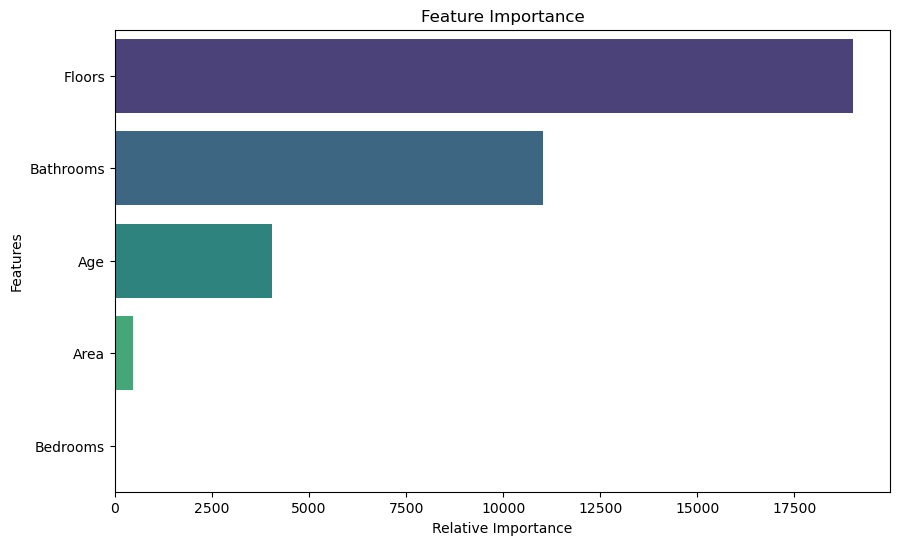

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

### Predicted House Price Function Using Area, Bedrooms, Bathrooms, Floors, and Age

In [299]:
def predict_price(area, bedrooms, bathrooms, floors, age):
    input_features = pd.DataFrame({
        'Area': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Floors': [floors],
        'Age': [age]
    })
    input_features_scaled = scaler.fit_transform(input_features)
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0].round()

In [300]:
predict_price(2500, 3, 2, 1, 20)

535901.0

In [308]:
area = 2500
bedrooms = 3
bathrooms = 2
floors = 1
year_built = 2003
predicted_price = predict_price(area, bedrooms, bathrooms, floors, year_built)
print(f"""
Predicted House Price for 
    {area} sq ft, 
    {bedrooms} bedrooms,
    {bathrooms} bathrooms, 
    {floors} floor(s), 
    built in {year_built}: 
    ${predicted_price:.0f}""")


Predicted House Price for 
    2500 sq ft, 
    3 bedrooms,
    2 bathrooms, 
    1 floor(s), 
    built in 2003: 
    $535901
